# Multi Layer Neural Network 

problem_statement :

For a given dataset predict whether customer will exit (Output variable “Exited”) the bank or not using artificial neural network
https://drive.google.com/open?id=1aYpqp7vGd1vy76fhP-2IQJywn0BLt3eM


In [1]:
#importing necessary libraries

#importing pandas library to handel dataset
import pandas as pd
#importing numpy library for faster matrix calculations
import numpy as np
#importing job-lib
import joblib
#importing matplotlib for plotting data graphs
import matplotlib.pyplot as plt
#importing seaborn advanced plotting library
import seaborn as sns

#loading data set
bank_data = pd.read_csv("Churn_Modelling.csv",)
#seeing data set
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### evaluating data / data pre processing

In [2]:
#counting number of yes and no values in y
count_y_values = bank_data['Exited'].value_counts()
count_y_values

0    7963
1    2037
Name: Exited, dtype: int64

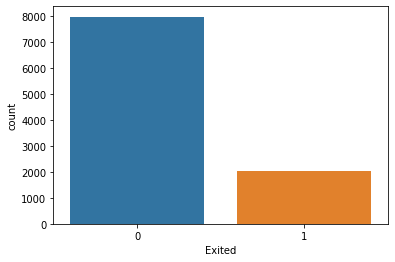

In [3]:
#plotting histogram of the exited values count
sns.countplot(x='Exited',data=bank_data)

In [4]:
#checking dependency of target value on features
#checking mean of all columns at y=0 and y=1
bank_data.groupby('Exited').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [5]:
bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
#checking mean of all columns at Surname = different cataegories ...note at value changing of y only...
#this will show the variation of y on Surname(catagory wise)...like which surname category have how many people exited 
bank_data.groupby('Surname').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Surname,,,,,,,,,,,
Abazu,4191.0,1.564247e+07,647.000000,30.00,7.500000,42767.4150,1.00,0.500000,0.0,108782.110000,0.00
Abbie,842.0,1.573779e+07,818.000000,31.00,1.000000,186796.3700,1.00,0.000000,0.0,178252.630000,0.00
Abbott,4235.0,1.569580e+07,689.250000,33.25,2.500000,54636.1025,1.75,1.000000,0.5,79166.460000,0.25
Abdullah,8485.0,1.560101e+07,802.000000,60.00,3.000000,92887.0600,1.00,1.000000,0.0,39473.630000,1.00
Abdulov,6206.5,1.570668e+07,614.500000,33.50,6.000000,119347.7850,1.50,1.000000,1.0,147758.360000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
Zubarev,7144.0,1.565509e+07,686.333333,40.00,6.333333,0.0000,2.00,0.333333,1.0,75098.623333,0.00
Zubareva,2947.0,1.572770e+07,592.000000,42.00,1.000000,147249.2900,2.00,1.000000,1.0,63023.020000,0.00
Zuev,1031.0,1.568117e+07,730.000000,39.00,1.000000,116537.6000,1.00,0.000000,0.0,145679.600000,0.00


In [7]:
bank_data.groupby('Geography').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,
France,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [8]:
bank_data.groupby('Gender').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,
Female,4942.929562,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,5048.427891,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [9]:
#checking info of data set
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# checking null values in data set
bank_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# from initial impression and after seeing the means of above columns dropping unnecessary columns
bank_data = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1)

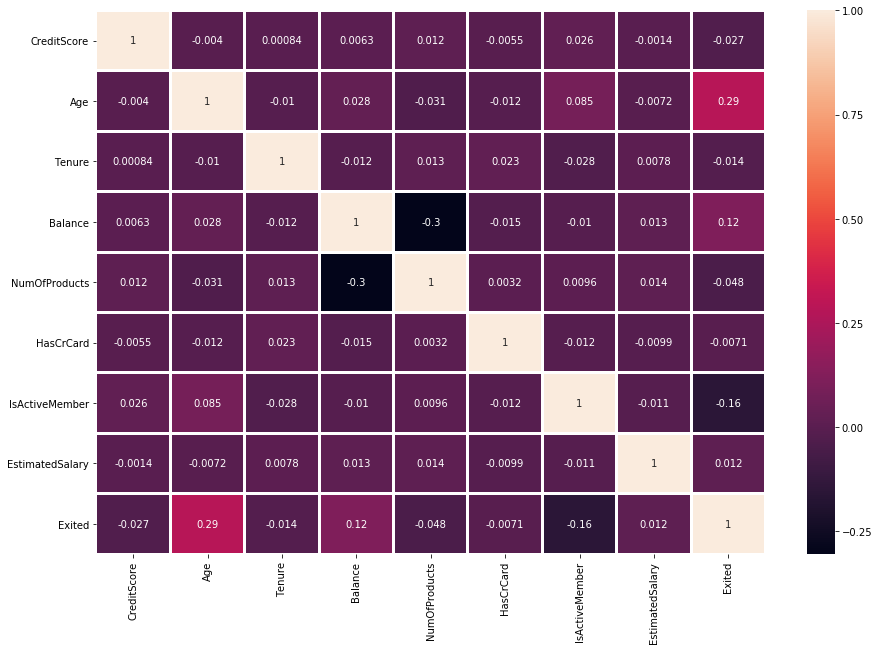

In [12]:
# checking if any of pairs of features that are well correlated to each other so one of it can be removed
plt.figure(figsize=(15,10))
sns.heatmap(bank_data.corr(), annot=True, linewidths=2)
plt.show()

In [13]:
bank_data.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [14]:
bank_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
# converted categorical data into 0 & 1
# if only 2 categories then 0 & 1  
# categories > 2  each categories will be assigned new column
# one hot encoding
def one_hot_encoding(data):
    categorical_col = [col for col in data.columns if data[col].dtype == 'O']
    
    for col in categorical_col:
        # sorting ccatories of the column
        categories = sorted(data[col].unique())
        if len(categories) == 2:
            code = 0
            for category in categories:
                data.loc[data[col] == category, col] = code
                code += 1

    categorical_col = [col for col in data.columns if data[col].dtype == 'O']

    for col in categorical_col:
        categories = sorted(data[col].unique())
        for category in categories:
            data[category] = np.zeros(len(data))

    for col in categorical_col:
        categories = sorted(data[col].unique())
        for category in categories:
            data.loc[data[col] == category, category] = 1

    data.drop(categorical_col, axis=1, inplace=True)
    return data


bank_data = one_hot_encoding(bank_data)

In [16]:
#looking at data after making catagorical to numerical values
bank_data.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0.0,0.0,1.0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1.0,0.0,0.0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.0,1.0,0.0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1.0,0.0,0.0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1.0,0.0,0.0


In [17]:
#performing scaling on data\
# scaling all columns in range 0-1 
def min_max_normalisation(data):
    for col in data.columns:
        minimum = data[col].min()
        maximum = data[col].max()
        data[col] = (data[col] - minimum)/(maximum - minimum)
    
    return data

bank_data = min_max_normalisation(bank_data)

### Seperating training and test data sets 

In [18]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set

# selecting random 0.7 fraction of dataset as train set
train = bank_data.sample(frac=0.7, random_state=3)   

# chossing different random state will give different random rows
# selecting remaining i.e. 30% as test set
test = bank_data.drop(train.index)  

#printing train data set shape and it's head values
print("shape of train data : ",train.shape)
train.head()

shape of train data :  (7000, 13)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
5876,0.708,1.0,0.283784,0.2,0.444503,0.000000,1.0,0.0,0.997462,0.0,1.0,0.0,0.0
6555,0.582,1.0,0.229730,0.5,0.000000,0.333333,1.0,0.0,0.465731,0.0,1.0,0.0,0.0
1448,0.410,0.0,0.378378,0.4,0.479848,0.000000,1.0,0.0,0.888626,1.0,0.0,1.0,0.0
3351,0.248,0.0,0.216216,0.9,0.702721,0.000000,1.0,0.0,0.801085,0.0,0.0,1.0,0.0
231,0.520,1.0,0.297297,0.0,0.000000,0.333333,1.0,0.0,0.311135,0.0,1.0,0.0,0.0


In [19]:
#printing test data set shape and it's head values
print("shape of test data : ",test.shape)
test.head()

shape of test data :  (3000, 13)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0
5,0.590,1.0,0.351351,0.8,0.453394,0.333333,1.0,0.0,0.748797,1.0,0.0,0.0,1.0
7,0.052,0.0,0.148649,0.4,0.458540,1.000000,1.0,0.0,0.596733,1.0,0.0,1.0,0.0
11,0.294,1.0,0.081081,0.3,0.000000,0.333333,1.0,0.0,0.381929,0.0,0.0,0.0,1.0
12,0.252,0.0,0.216216,1.0,0.000000,0.333333,1.0,0.0,0.131260,0.0,1.0,0.0,0.0


In [20]:
#defining a method to seperate xtrain,xtest,ytrain,ytest data since there are large number of columns
def split_train_test_x_y(data):   
    #seperating x values
    y_values = np.array(data['Exited'])
    #seperating y values
    x_values = np.ones((1,len(data)))
    
    for col in data.columns:
        if col != 'Exited':
            new_row = np.array(data[col]).reshape(1,len(data))
            x_values = np.append(x_values, new_row, axis=0)

    return x_values, y_values

#obtaining x-train,x-test,y-train,y-test values by calling above function
train_x_values, train_y_values = split_train_test_x_y(train)
test_x_values, test_y_values = split_train_test_x_y(test)

In [21]:
# just printing out the shapes of train and test data set
print(train_x_values.shape)
print(train_y_values.shape)
print(test_x_values.shape)
print(test_y_values.shape)

(13, 7000)
(7000,)
(13, 3000)
(3000,)


### making multi layer neural network model

In [22]:
# this function takes an array and returns sigmoid of that array
def sigmoid_function(array):
    return 1/(1+np.exp(-1*(array)))

In [23]:
def cost_function(A2,y_values):
    return (-(y_values * np.log(A2) + (1 - y_values) * np.log(1 - A2))).mean()

In [24]:
#this is our main function which is training our algorithm
#and will return the cost function variation and learned weights
def training_model(x_values, y_values):
    # number of data in each feature
    total        = len(train)
    
    #number of iterations we are going to perform
    iterations   = 10000
    
    #this is our learning rate by which data set is going to learn
    alpha        =  0.1
    
    # a list to store cost function after each iteration
    costs        = []
    # weights for input to first layer   # here we have 4 neurons in first layer 
    weight_one   = np.random.rand(4, len(train_x_values)) * 0.01   

    # taking random weights for input to final/output layer
    weight_two   = np.random.rand(4)               
    bias_two     = np.random.rand(4,1)
    weight_three = np.random.rand(4)
    bias_three   = np.random.rand(1)
    
    #looping 
    for _ in range(iterations):
        ##              forward.......propagating                 ##
        # creating array like multiple linear regression for first layer neurons
        z_one           = weight_one.dot(x_values) 

        # creating neurons in first layer
        a_one           = sigmoid_function(z_one) 
        
        # creating array like multiple linear regression for  layer
        z_two           = weight_two.dot(a_one) + bias_two 

        # applying sigmoid function as activation function for neurons in second layer
        a_two           = sigmoid_function(z_two)
        
        # creating array like multiple linear regression for output/final layer
        z_three         = weight_three.dot(a_two) + bias_three
        
        # implementing sigmoid function find probablity of default category
        a_three         = sigmoid_function(z_three)
        
        # calculating cost at each iteration
        costs.append(cost_function(a_three,y_values))
        

        ##        backward..............propagating       ##
        # defining derivatives for 
        #error in third layer
        delta_Z3        = a_three - train_y_values
        
        # error in weights of third layer
        delta_W3        = delta_Z3.dot(a_two.T)/total 
        
        #error in bias of third layer     
        delta_bias_3    = delta_Z3.sum()/total 
        
        #error in second layer
        delta_Z2        = weight_three.dot(delta_Z3 * a_two * (1 - a_two))                     #  derivative of the sigmoid function

        # error in weights of second layer
        delta_W2        = (delta_Z2.dot(a_one.T))/ total
        
        #error in bias of second layer
        delta_bias_2    = delta_Z2.sum()/total

        #error in first layer
        delta_Z1        = weight_two.dot(delta_Z2 * a_one * (1 - a_one))           # element wise product (*)

        # error in weights of first layer
        delta_W1        = (delta_Z1.dot(x_values.T))/total  
        
        #adjusting weights and bias elements in each iteration
        weight_one      = weight_one    - alpha * delta_W1
        weight_two      = weight_two    - alpha * delta_W2
        weight_three    = weight_three  - alpha * delta_W3
        bias_two        = bias_two      - alpha * delta_bias_2
        bias_three      = bias_three    - alpha * delta_bias_3
        
    return weight_one ,weight_two, weight_three, bias_two, bias_three, costs,iterations

In [25]:
#obataining weights and bias after training model
weight_one, weight_two, weight_three, bias_two, bias_three,costs,iterations = training_model(train_x_values, train_y_values)

In [26]:
#exporting weights into pkl file
joblib.dump(weight_one,'02_weight_one')
joblib.dump(weight_two,'02_weight_two')
joblib.dump(weight_three,'02_weight_three')
joblib.dump(bias_two,'02_bias_two')
joblib.dump(bias_three,'02_bias_three')

['02_bias_three']

### plotting graph of cost function v/s number of iterations 

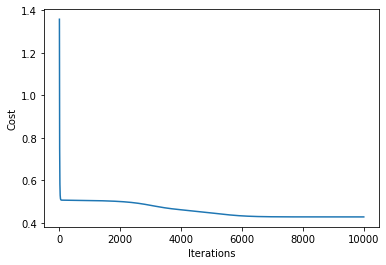

In [27]:
plt.plot(np.arange(iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### checking accuracy of model 

In [28]:
# defining function to predict the output based on adjusted weights with given data
def predict_output(x_values):
   # creating array like multiple linear regression for first layer neurons
    z_one = weight_one.dot(x_values) 

    # creating neurons in first layer
    a_one = sigmoid_function(z_one) 

    # creating array like multiple linear regression for output/final layer
    z_two = weight_two.dot(a_one) + bias_two

    # applying sigmoid function as activation function for neurons in second layer
    a_two = sigmoid_function(z_two)
        
    z_three = weight_three.dot(a_two) + bias_three
        
    # implementing sigmoid function find probablity of default category
    a_three = sigmoid_function(z_three)
    
    return a_three

In [29]:
#obtaining predicted values of train and test data sets seperately
train_predicted_values = predict_output(train_x_values)
test_predicted_values = predict_output(test_x_values)

In [30]:
# categorising predicted values of logistic regression
def compare_outputs(y_values):
    return np.where(y_values >= 0.5, 1, 0)

In [31]:
# comparing the predicted and actual outputs abtained...
train_predicted_values = compare_outputs(train_predicted_values)
test_predicted_values  = compare_outputs(test_predicted_values)

In [32]:
# defining a function to check accuracy
def accuracy(predicted_values, actual_values):
    return (predicted_values == actual_values).mean()*100

In [33]:
# obatainig the accuracy of train set and printing its value
train_accuracy_percent = accuracy(train_predicted_values, train_y_values)
train_accuracy_percent

80.80000000000001

In [34]:
# obatainig the accuracy of test set and printing its value
test_accuracy_percent = accuracy(test_predicted_values, test_y_values)
test_accuracy_percent

81.0